In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

import seaborn as sns
import matplotlib.pyplot as plt    

In [15]:
# Reading csv of the dataset
heart = pd.read_csv("heart.csv")
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [152]:
# Checking class counts. The data is slightly imbalanced in favour of the positive. 
heart["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

In [6]:
# categoricals = sex, cp, rest_ecg. The categorical variables need to be isolated 
# to perform one hot encoding. 

In [100]:
# Two dataframes are created, split into the numerical and categorical variables. 
heart_numerical = heart[["age", "trtbps", "chol","fbs","thalachh","exng","oldpeak","slp","caa","thall"]]
heart_categorical = heart[["sex", "cp","restecg"]].astype("category")
# The categorical variables are converted into one-hot encoded variables. 
heart_categorical = pd.get_dummies(heart_categorical)

In [101]:
# The categorical and numerical variables are combined into one dataframe. 
features = pd.concat([heart_categorical, heart_numerical], axis = 1)
# The label column is isolated. 
labels = heart["output"]

In [141]:
# The data is split into test and train sets. 
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42, test_size = 0.25)

In [142]:
# The data is split into categorical and numerical variables again to apply the StandardScaler to the 
# numerical variables separately of the categorical variables. 
X_train_numerical = X_train[["age", "trtbps", "chol","fbs","thalachh","exng","oldpeak","slp","caa","thall"]]
X_test_numerical = X_test[["age", "trtbps", "chol","fbs","thalachh","exng","oldpeak","slp","caa","thall"]]

X_train_cat = X_train[["sex_0", "sex_1", "cp_0", "cp_1", "cp_3", "restecg_0", "restecg_1", "restecg_2"]]
X_test_cat = X_test[["sex_0", "sex_1", "cp_0", "cp_1", "cp_3", "restecg_0", "restecg_1", "restecg_2"]]

scaler = preprocessing.StandardScaler()

# Scaler is applied. The index from the original data frame is kept so the newly scaled variables can be 
# combined with the categorical variables. 
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numerical), 
                              index = X_train_numerical.index,
                              columns = ["age", "trtbps", "chol","fbs","thalachh","exng","oldpeak","slp","caa","thall"])
X_test_scaled = pd.DataFrame(scaler.transform(X_test_numerical), 
                             index = X_test_numerical.index,
                             columns = ["age", "trtbps", "chol","fbs","thalachh","exng","oldpeak","slp","caa","thall"])

In [143]:
# The scaled numerical and categorical variables are combined into a train and test features dataframe. 
X_train = pd.concat([X_train_scaled, X_train_cat], axis = 1)
X_test = pd.concat([X_test_scaled, X_test_cat], axis = 1)

In [182]:
# A Support Vector Machine is defined. 
svc = SVC()

# Parameters are defined for the grid search. 
param = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf'], 'gamma': [0.01 ,0.001, 0.0001], 'degree' : [1,2,3,4,5]}
 ]

# The grid search is implemented. The F1 score is selected for the scoring argument as the dataset is slightly
# imbalanced. 
clf = GridSearchCV(svc, param, scoring = 'f1')
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'degree': [1, 2, 3, 4, 5],
                          'gamma': [0.01, 0.001, 0.0001],
                          'kernel': ['linear', 'rbf']}],
             scoring='f1')

In [183]:
# Predictions are generated using the classifier above. 
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[28  7]
 [ 3 38]]
0.868421052631579


<Axes: >

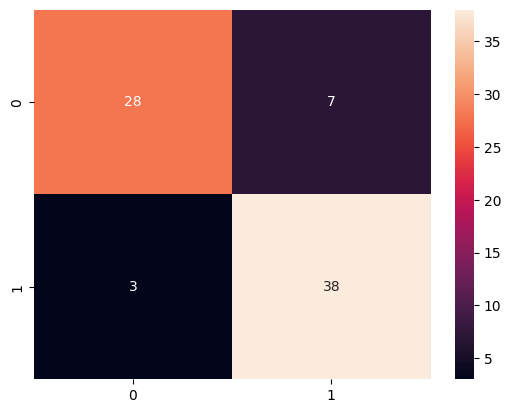

In [184]:
# Heatmap is generated based on the confusion matrix for readability. 
sns.heatmap(cm, annot=True, fmt='g')